In [9]:
from sqlalchemy import create_engine
import pymssql
import pandas as pd

server = "mssql-82792-0.cloudclusters.net:16272"
username = "user"
password = "" # paste password between quote marks
database = "ghz"
string = "mssql+pymssql://" + username + ":" + password + "@" + server + "/" + database
conn = create_engine(string).connect()

In [10]:
data = pd.read_sql(
    """
    select ticker, date, ret, roeq 
    from data
    order by date
    """, 
    conn
)
data = data.dropna()
data.head()

,ticker,date,ret,roeq
0,EWST,2000-01,-0.044118,0.017047
1,SABC,2000-01,-0.025641,0.027942
2,IROQ,2000-01,-0.008475,0.031816
3,DPAC,2000-01,-0.097276,0.045041
4,SCTT,2000-01,-0.099338,0.061219


In [15]:
data["decile"] = data.groupby("date").roeq.transform(
  lambda x: pd.qcut(x, 10, labels=range(1, 11))
)
data.head()

,ticker,date,ret,roeq,decile
0,EWST,2000-01,-0.044118,0.017047,5
1,SABC,2000-01,-0.025641,0.027942,6
2,IROQ,2000-01,-0.008475,0.031816,7
3,DPAC,2000-01,-0.097276,0.045041,8
4,SCTT,2000-01,-0.099338,0.061219,9


In [16]:
rets = data.groupby(['date', 'decile']).ret.mean()
rets = rets.unstack()
rets.head()

decile,1,2,3,4,5,6,7,8,9,10
date,,,,,,,,,,
2000-01,0.246916,0.151861,0.092103,0.058965,0.028533,0.005136,-0.010629,-0.018565,-0.015242,0.009180
2000-02,0.454648,0.278680,0.181831,0.101405,0.038433,0.049454,0.047438,0.039655,0.038870,0.088092
2000-03,-0.081122,-0.050578,0.007382,0.021363,0.016890,0.020625,0.037476,0.036369,0.059420,0.049514
2000-04,-0.265117,-0.170325,-0.093372,-0.053375,-0.042793,-0.031392,-0.013409,-0.022967,-0.026070,-0.068830
2000-05,-0.171795,-0.096714,-0.073846,-0.039473,-0.033150,-0.007287,-0.027551,-0.022489,-0.030286,-0.057735


In [17]:
rets.mean()

decile
1     0.009488
2     0.010678
3     0.011362
4     0.012129
5     0.012188
6     0.012207
7     0.012233
8     0.012872
9     0.012849
10    0.012515
dtype: float64

<AxesSubplot: xlabel='date'>

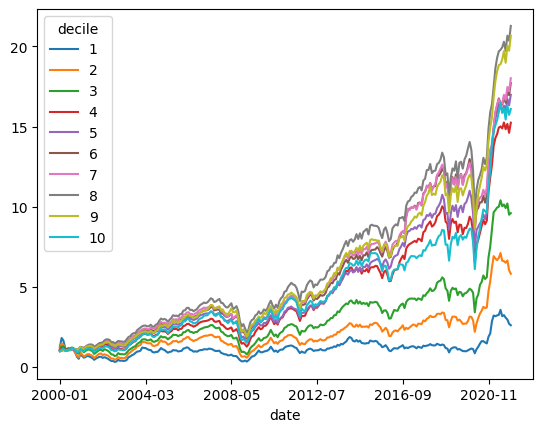

In [18]:
(1+rets).cumprod().plot()